In [3]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [4]:
import os
file_list = os.listdir('./training_data_new')

In [6]:
file_list

['0.csv',
 '1.csv',
 '10.csv',
 '100.csv',
 '1000.csv',
 '10000.csv',
 '10001.csv',
 '10002.csv',
 '10003.csv',
 '10004.csv',
 '10005.csv',
 '10006.csv',
 '10007.csv',
 '10008.csv',
 '10009.csv',
 '1001.csv',
 '10010.csv',
 '10011.csv',
 '10012.csv',
 '10013.csv',
 '10014.csv',
 '10015.csv',
 '10016.csv',
 '10017.csv',
 '10018.csv',
 '10019.csv',
 '1002.csv',
 '10020.csv',
 '10021.csv',
 '10022.csv',
 '10023.csv',
 '10024.csv',
 '10025.csv',
 '10026.csv',
 '10027.csv',
 '10028.csv',
 '10029.csv',
 '1003.csv',
 '10030.csv',
 '10031.csv',
 '10032.csv',
 '10033.csv',
 '10034.csv',
 '10035.csv',
 '10036.csv',
 '10037.csv',
 '10038.csv',
 '10039.csv',
 '1004.csv',
 '10040.csv',
 '10041.csv',
 '10042.csv',
 '10043.csv',
 '10044.csv',
 '10045.csv',
 '10046.csv',
 '10047.csv',
 '10048.csv',
 '10049.csv',
 '1005.csv',
 '10050.csv',
 '10051.csv',
 '10052.csv',
 '10053.csv',
 '10054.csv',
 '10055.csv',
 '10056.csv',
 '10057.csv',
 '10058.csv',
 '10059.csv',
 '1006.csv',
 '10060.csv',
 '10061.csv'

In [7]:
len(file_list)

9400

In [5]:
def create_dataset_train(list_of_files, time_steps, number_of_variables, prediction_steps , training_size=7000, variable_index = 0):
    X_train, y_train = np.zeros((training_size,time_steps,number_of_variables)), np.zeros((training_size,prediction_steps))
    for i in range(training_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = file.to_numpy()[-prediction_steps:,variable_index]
    return X_train, y_train

In [6]:
def min_max_scaling(dataset, scaler=False):
    reshaped_dataset = dataset.reshape(dataset.shape[0]*dataset.shape[1], dataset.shape[2])
    scaler = scaler
    if scaler==False:
        scaler = MinMaxScaler()
        reshaped_dataset = scaler.fit_transform(reshaped_dataset)
    else:
        scaler = scaler
        reshaped_dataset = scaler.transform(reshaped_dataset)
    reshaped_dataset = reshaped_dataset.reshape(dataset.shape[0],dataset.shape[1], dataset.shape[2])    
    return reshaped_dataset, scaler

In [7]:
def create_dataset_valid(list_of_files, time_steps, number_of_variables, prediction_steps , valid_start=7000, valid_size=1000, variable_index = 0):
    X_train, y_train = np.zeros((valid_size,time_steps,number_of_variables)), np.zeros((valid_size,prediction_steps))
    for i in range(valid_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[valid_start+i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = file.to_numpy()[-prediction_steps:,variable_index]
    return X_train, y_train

In [8]:
def create_dataset_test(list_of_files, time_steps, number_of_variables, prediction_steps , test_start=8000, test_size=1400, variable_index = 0):
    X_train, y_train = np.zeros((test_size,time_steps,number_of_variables)), np.zeros((test_size,prediction_steps))
    for i in range(test_size):
        file= pd.read_csv("./training_data_new/"+list_of_files[test_start+i])
        X_train[i,:,:] = file.to_numpy()[:time_steps, :]
        y_train[i,:] = file.to_numpy()[-prediction_steps:,variable_index]
    return X_train, y_train

In [9]:
# variable definition
file = pd.read_csv("./training_data_new/"+file_list[0])
predict_steps = 5
time_steps = file.to_numpy().shape[0] - predict_steps
number_of_variables = file.to_numpy().shape[1]

In [12]:
file.to_numpy().shape[1]

12

In [13]:
X_xtrain, y_xtrain = create_dataset_train(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=0)
X_xvalid, y_xvalid = create_dataset_valid(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=0)
X_xtest, y_xtest = create_dataset_test(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=0)

In [15]:
min_max_scaling(X_xtrain)[0].shape

(7000, 62, 12)

In [85]:
X_xtrain.shape

(7000, 62, 12)

In [38]:
y_xtrain.shape

(7000, 5)

In [43]:
X_xvalid.shape

(1000, 62, 12)

In [45]:
y_xvalid.shape

(62, 5)

In [16]:
model_x = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,12], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=5,activation='linear')
])
model_x.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_x = model_x.fit(X_xtrain, y_xtrain, epochs=10, validation_data=(X_xvalid, y_xvalid))

Epoch 1/10
219/219 [==============================] - 11s 42ms/step - loss: 1230.9131 - mse: 1230.9131 - val_loss: 755.6128 - val_mse: 755.6128
Epoch 2/10
219/219 [==============================] - 9s 40ms/step - loss: 646.3606 - mse: 646.3606 - val_loss: 504.5950 - val_mse: 504.5950
Epoch 3/10
219/219 [==============================] - 9s 39ms/step - loss: 473.0016 - mse: 473.0016 - val_loss: 428.4445 - val_mse: 428.4445
Epoch 4/10
219/219 [==============================] - 9s 39ms/step - loss: 369.9850 - mse: 369.9850 - val_loss: 282.3920 - val_mse: 282.3920
Epoch 5/10
219/219 [==============================] - 9s 40ms/step - loss: 337.5467 - mse: 337.5467 - val_loss: 264.2658 - val_mse: 264.2658
Epoch 6/10
219/219 [==============================] - 9s 40ms/step - loss: 234.9398 - mse: 234.9398 - val_loss: 205.3378 - val_mse: 205.3378
Epoch 7/10
219/219 [==============================] - 9s 40ms/step - loss: 156.3232 - mse: 156.3232 - val_loss: 162.7844 - val_mse: 162.7844
Epoch 8/10

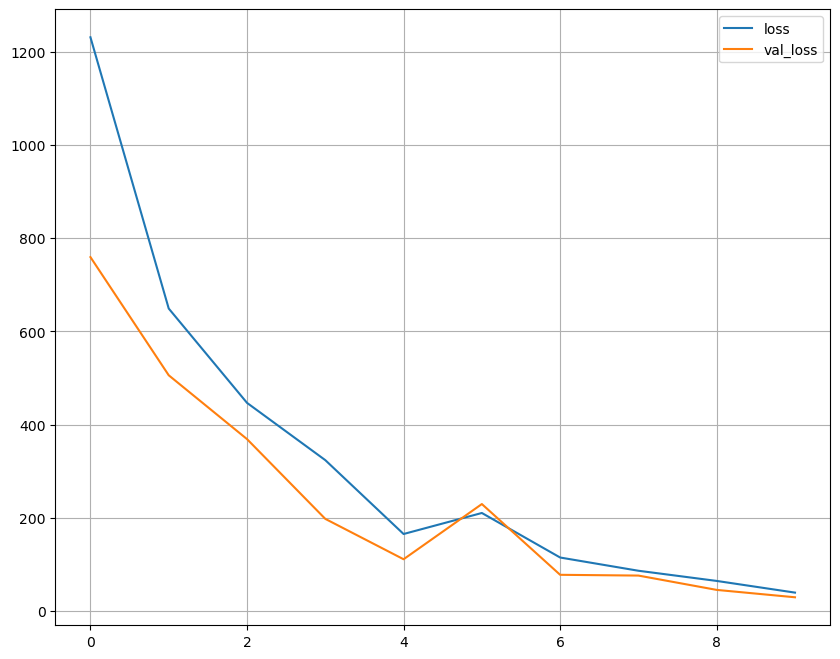

In [60]:
pd.DataFrame(history_x.history).plot(figsize=(10,8))
plt.grid(True)

In [61]:
model_x.evaluate(X_xtest, y_xtest)

44/44 [==============================] - 1s 19ms/step - loss: 39.1437


39.14368438720703

In [17]:
X_ytrain, y_ytrain = create_dataset_train(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=1)
X_train_scaled, scaler = min_max_scaling(X_ytrain)
X_yvalid, y_yvalid = create_dataset_valid(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=1)
X_yvalid_scaled,_ = min_max_scaling(X_yvalid, scaler)
X_ytest, y_ytest = create_dataset_test(file_list, time_steps=time_steps, number_of_variables=number_of_variables, prediction_steps=predict_steps, variable_index=1)
X_ytest_scaled,_ = min_max_scaling(X_yvalid, scaler)

In [18]:
model_y = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,12], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=5,activation='linear')
])
model_y.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_y = model_y.fit(X_ytrain, y_ytrain, epochs=10, validation_data=(X_yvalid, y_yvalid))

Epoch 1/10
219/219 [==============================] - 11s 42ms/step - loss: 958347.0000 - mse: 958347.0000 - val_loss: 983782.0625 - val_mse: 983782.0625
Epoch 2/10
219/219 [==============================] - 9s 40ms/step - loss: 928306.6250 - mse: 928306.6250 - val_loss: 955085.7500 - val_mse: 955085.7500
Epoch 3/10
219/219 [==============================] - 9s 40ms/step - loss: 901234.5625 - mse: 901234.5625 - val_loss: 927712.0625 - val_mse: 927712.0625
Epoch 4/10
219/219 [==============================] - 9s 40ms/step - loss: 875192.0000 - mse: 875192.0000 - val_loss: 901225.5625 - val_mse: 901225.5625
Epoch 5/10
219/219 [==============================] - 9s 41ms/step - loss: 849973.0000 - mse: 849973.0000 - val_loss: 875544.5000 - val_mse: 875544.5000
Epoch 6/10
219/219 [==============================] - 9s 40ms/step - loss: 825473.3750 - mse: 825473.3750 - val_loss: 850472.6875 - val_mse: 850472.6875
Epoch 7/10
219/219 [==============================] - 9s 40ms/step - loss: 801600

In [110]:
model_y_scaled = keras.models.Sequential([
    keras.layers.LSTM(units=70, input_shape=[62,12], return_sequences=True),
    keras.layers.LSTM(units=70),
    keras.layers.Dense(units=5,activation='linear')
])
model_y_scaled.compile(optimizer='adam', loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_y_scaled = model_y_scaled.fit(X_train_scaled, y_ytrain, epochs=40, validation_data=(X_yvalid_scaled, y_yvalid))

Epoch 1/40
219/219 [==============================] - 22s 59ms/step - loss: 957184.5625 - mse: 957184.5625 - val_loss: 983106.9375 - val_mse: 983106.9375
Epoch 2/40
219/219 [==============================] - 11s 49ms/step - loss: 927906.6875 - mse: 927906.6875 - val_loss: 954839.6875 - val_mse: 954839.6875
Epoch 3/40
219/219 [==============================] - 10s 47ms/step - loss: 901093.2500 - mse: 901093.2500 - val_loss: 927628.2500 - val_mse: 927628.2500
Epoch 4/40
219/219 [==============================] - 10s 47ms/step - loss: 875164.6250 - mse: 875164.6250 - val_loss: 901275.4375 - val_mse: 901275.4375
Epoch 5/40
219/219 [==============================] - 10s 46ms/step - loss: 850009.5000 - mse: 850009.5000 - val_loss: 875592.7500 - val_mse: 875592.7500
Epoch 6/40
219/219 [==============================] - 10s 47ms/step - loss: 825535.3125 - mse: 825535.3125 - val_loss: 850579.2500 - val_mse: 850579.2500
Epoch 7/40
219/219 [==============================] - 10s 48ms/step - loss: 

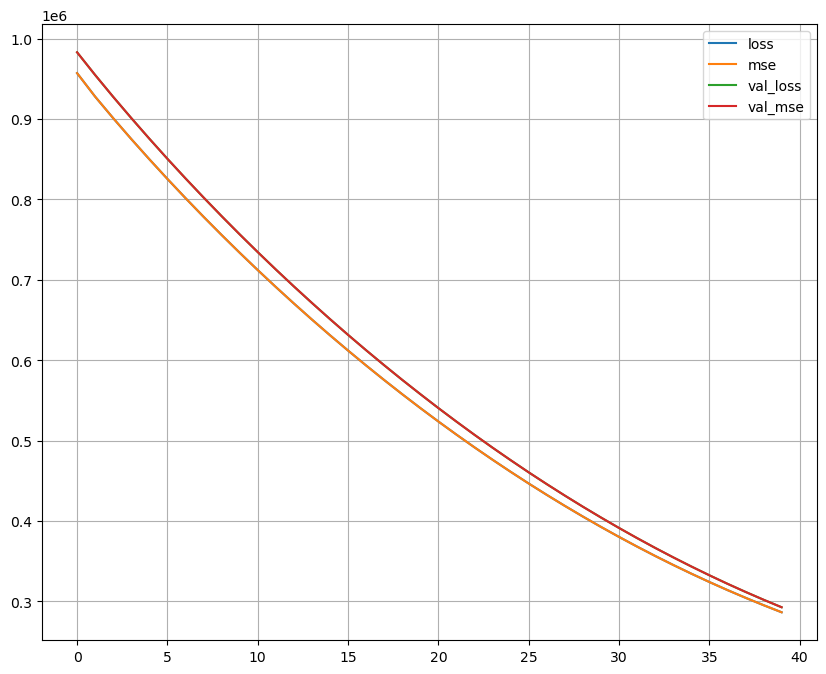

In [111]:
pd.DataFrame(history_y_scaled.history).plot(figsize=(10,8))
plt.grid(True)

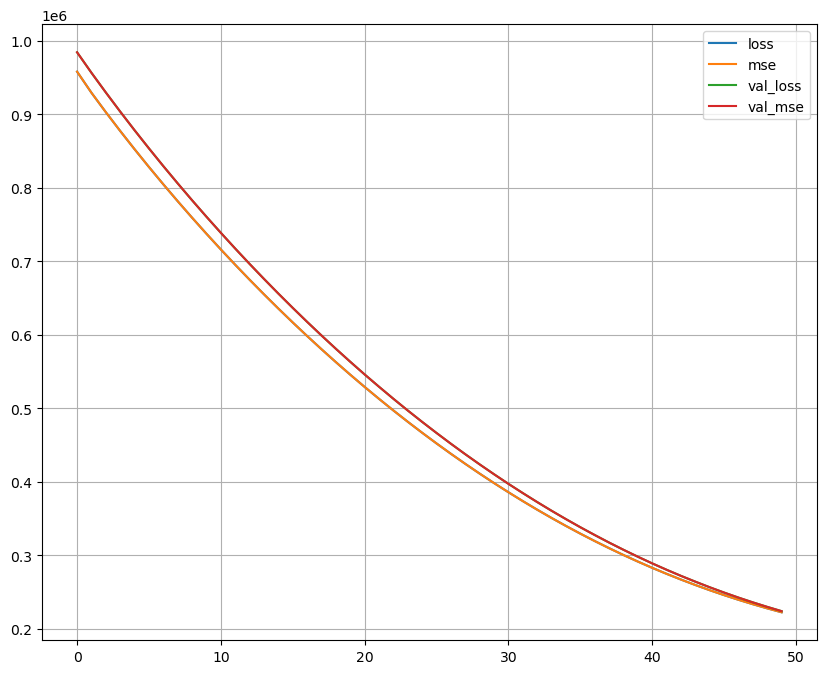

In [113]:
pd.DataFrame(history_y_scaled.history).plot(figsize=(10,8))
plt.grid(True)

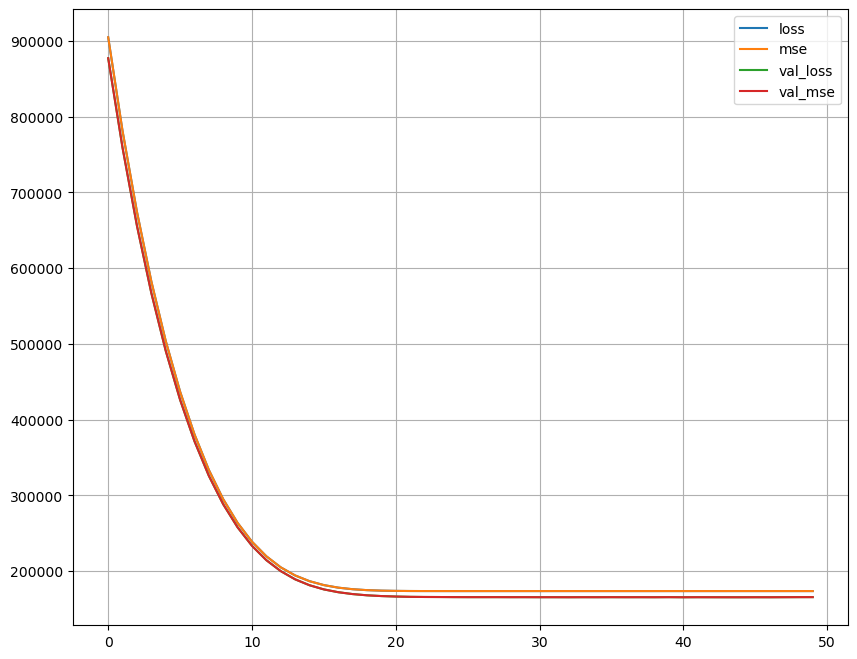

In [121]:
pd.DataFrame(history_y_scaled.history).plot(figsize=(10,8))
plt.grid(True)

In [29]:
model_y_scaled = keras.models.Sequential([
    keras.layers.LSTM(units=1000, input_shape=[62,12]),
    keras.layers.Dense(5, activation='linear')
])

In [30]:
model_y_scaled.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 1000)              4052000   
                                                                 
 dense_5 (Dense)             (None, 5)                 5005      
                                                                 
Total params: 4,057,005
Trainable params: 4,057,005
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_y_scaled.compile(optimizer=keras.optimizers.Adam(), loss = 'mse', metrics=['mse'])

# Assuming you have X_train and y_train for training data
# Adjust batch_size and epochs based on your requirements
history_y= model_y_scaled.fit(X_ytrain, y_ytrain, epochs=25 , validation_data=(X_yvalid, y_yvalid))

Epoch 1/25
219/219 [==============================] - 51s 226ms/step - loss: 823747.5000 - mse: 823747.5000 - val_loss: 714927.3750 - val_mse: 714927.3750
Epoch 2/25
219/219 [==============================] - 49s 224ms/step - loss: 576643.5000 - mse: 576643.5000 - val_loss: 505139.0312 - val_mse: 505139.0312
Epoch 3/25
219/219 [==============================] - 49s 224ms/step - loss: 406731.6562 - mse: 406731.6562 - val_loss: 356740.7500 - val_mse: 356740.7500
Epoch 4/25
219/219 [==============================] - 49s 224ms/step - loss: 284383.0312 - mse: 284383.0312 - val_loss: 246663.0938 - val_mse: 246663.0938
Epoch 5/25
219/219 [==============================] - 49s 225ms/step - loss: 197177.0000 - mse: 197177.0000 - val_loss: 172014.0781 - val_mse: 172014.0781
Epoch 6/25
219/219 [==============================] - 49s 224ms/step - loss: 138782.0938 - mse: 138782.0938 - val_loss: 121536.8750 - val_mse: 121536.8750
Epoch 7/25
219/219 [==============================] - 49s 222ms/step -

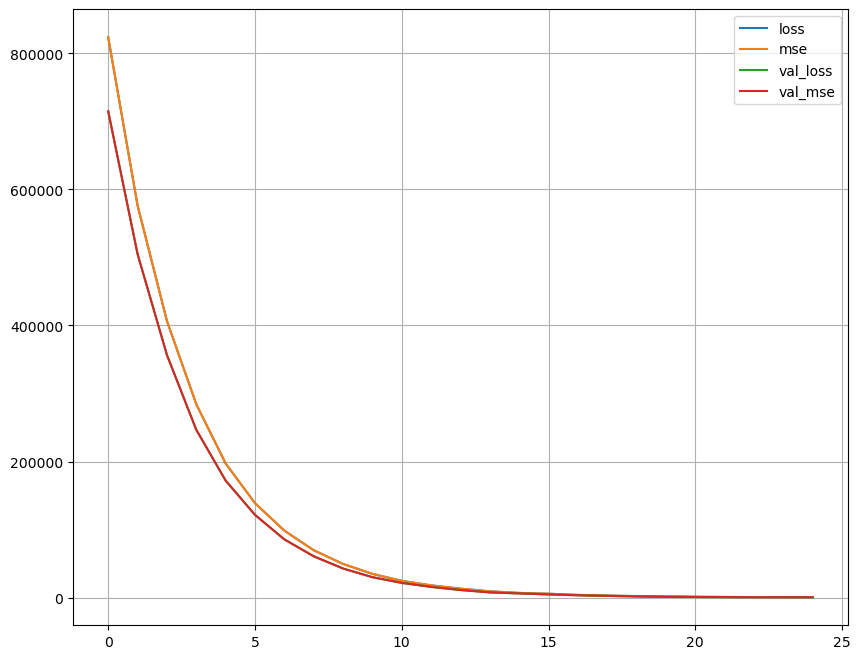

In [34]:
pd.DataFrame(history_y.history).plot(figsize=(10,8))
plt.grid(True)

In [35]:
model_y_scaled.predict(X_xtest)

44/44 [==============================] - 2s 48ms/step


array([[1070.0251 , 1071.6277 , 1074.5297 , 1077.3923 , 1079.2611 ],
       [1239.8567 , 1241.1875 , 1243.7618 , 1246.9824 , 1248.9941 ],
       [1483.4323 , 1485.7579 , 1488.0531 , 1490.2881 , 1492.8002 ],
       ...,
       [1011.84375, 1013.6605 , 1016.6993 , 1019.7757 , 1021.3121 ],
       [1228.3691 , 1229.7405 , 1232.5662 , 1235.5137 , 1237.8563 ],
       [1468.8132 , 1471.4742 , 1473.7916 , 1476.1929 , 1478.8499 ]],
      dtype=float32)

In [36]:
y_ytest

array([[1065.401, 1068.72 , 1072.035, 1075.34 , 1078.643],
       [1240.67 , 1242.67 , 1244.674, 1246.678, 1248.673],
       [1482.324, 1484.899, 1487.462, 1490.011, 1492.549],
       ...,
       [1012.551, 1015.547, 1018.523, 1021.491, 1024.466],
       [1226.385, 1229.495, 1232.635, 1235.812, 1239.032],
       [1469.081, 1472.658, 1476.204, 1479.739, 1483.22 ]])

In [37]:
model_y_gru = keras.models.Sequential([
    keras.layers.GRU(units=1000, input_shape=[62,12]),
    keras.layers.Dense(5, activation='linear')
])
model_y_gru.compile(optimizer=keras.optimizers.Adam(), loss = 'mse', metrics=['mse'])
history_gru= model_y_gru.fit(X_ytrain, y_ytrain, epochs=25 , validation_data=(X_yvalid, y_yvalid))

Epoch 1/25
219/219 [==============================] - 34s 148ms/step - loss: 799903.5000 - mse: 799903.5000 - val_loss: 674058.8750 - val_mse: 674058.8750
Epoch 2/25
219/219 [==============================] - 32s 148ms/step - loss: 527551.8750 - mse: 527551.8750 - val_loss: 445772.8438 - val_mse: 445772.8438
Epoch 3/25
219/219 [==============================] - 33s 148ms/step - loss: 346757.0000 - mse: 346757.0000 - val_loss: 293867.4688 - val_mse: 293867.4688
Epoch 4/25
219/219 [==============================] - 32s 148ms/step - loss: 229285.0781 - mse: 229285.0781 - val_loss: 194782.7500 - val_mse: 194782.7500
Epoch 5/25
219/219 [==============================] - 33s 150ms/step - loss: 152814.7188 - mse: 152814.7188 - val_loss: 130386.8516 - val_mse: 130386.8516
Epoch 6/25
219/219 [==============================] - 33s 150ms/step - loss: 102955.5000 - mse: 102955.5000 - val_loss: 87884.2109 - val_mse: 87884.2109
Epoch 7/25
219/219 [==============================] - 33s 149ms/step - l

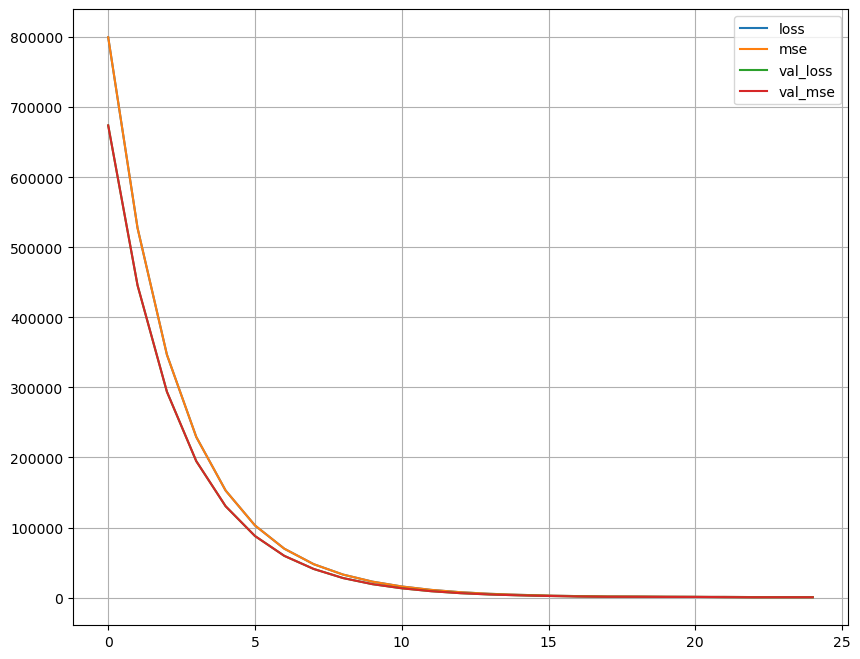

In [38]:
pd.DataFrame(history_gru.history).plot(figsize=(10,8))
plt.grid(True)

In [39]:

model_y_gru1Dconv = keras.models.Sequential([
    keras.layers.Conv1D(filters=10, kernel_size=4, strides=1, padding='valid',input_shape=[62, 12]),
    keras.layers.GRU(units=1000, input_shape=[62, 12]),
    keras.layers.Dense(5, activation='linear')
])
model_y_gru1Dconv.compile(optimizer=keras.optimizers.Adam(), loss='mse', metrics=['mse'])
history_gru1Dconv = model_y_gru1Dconv.fit(X_ytrain, y_ytrain, epochs=25, validation_data=(X_yvalid, y_yvalid))

Epoch 1/25
219/219 [==============================] - 37s 163ms/step - loss: 790837.0000 - mse: 790837.0000 - val_loss: 659514.5625 - val_mse: 659514.5625
Epoch 2/25
219/219 [==============================] - 36s 162ms/step - loss: 513737.1562 - mse: 513737.1562 - val_loss: 433730.9375 - val_mse: 433730.9375
Epoch 3/25
219/219 [==============================] - 35s 159ms/step - loss: 338499.5938 - mse: 338499.5938 - val_loss: 287476.1250 - val_mse: 287476.1250
Epoch 4/25
219/219 [==============================] - 35s 161ms/step - loss: 224890.0000 - mse: 224890.0000 - val_loss: 191639.6094 - val_mse: 191639.6094
Epoch 5/25
219/219 [==============================] - 35s 161ms/step - loss: 150572.9219 - mse: 150572.9219 - val_loss: 128715.3516 - val_mse: 128715.3516
Epoch 6/25
219/219 [==============================] - 35s 160ms/step - loss: 101481.5938 - mse: 101481.5938 - val_loss: 86817.7891 - val_mse: 86817.7891
Epoch 7/25
219/219 [==============================] - 35s 161ms/step - l